(0.001, 82730.93935576428)

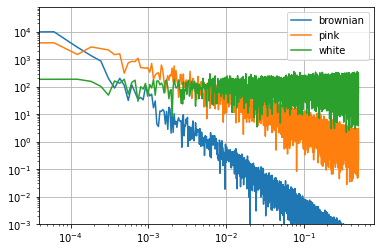

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_spectrum(s):
    # Return the Discrete Fourier Transform sample frequencies
    freqs = np.fft.rfftfreq(len(s))
    # Compute the one-dimensional discrete Fourier Transform for real input
    plt.loglog(freqs, np.abs(np.fft.rfft(s)))

def noise_psd(N, psd = lambda f: 1):
    # create N random standard gaussian points
    X_white = np.fft.rfft(np.random.randn(N))

    freqs = np.fft.rfftfreq(N)
    powers = psd(freqs)
    powers = powers / np.sqrt(np.mean(powers**2))
    X_shaped = X_white * powers
    return np.fft.irfft(X_shaped)

def white_noise(f):
    # constant power density regardless of frequency, so always return 1
    return 1

def pink_noise(f):
    # power density proportional to 1/f (logarithmic)
    return 1/np.where(f == 0, float('inf'), f)

def brownian_noise(f):
    # power density proportional to 1/f^2 (logarithmic)
    return 1/np.where(f == 0, float('inf'), np.power(f, 2))

plt.figure()
for psd in [brownian_noise, pink_noise, white_noise]:
    plot_spectrum(noise_psd(N=2**14, psd=psd))
plt.legend(['brownian', 'pink', 'white'])
plt.grid()
plt.ylim([1e-3, None])


/zfsauton2/home/chufang/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


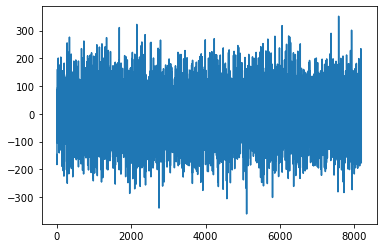

In [42]:
N = 2**14
# plt.scatter(np.arange(N), white_noise(N), alpha=.2)
# plt.scatter(np.arange(N), pink_noise(N), alpha=.1)
# plt.scatter(np.arange(N), brownian_noise(N), alpha=.1)

plt.plot( np.fft.rfft(np.random.randn(N)))
